In [2]:
import cv2
import numpy as np

In [32]:
image = cv2.imread('../DataBase/image7.jpg')

In [10]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

l_channel, a_channel, b_channel = cv2.split(image_lab)

l_threshold = cv2.adaptiveThreshold(l_channel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY_INV, 15, -5)

In [6]:
cv2.imwrite('ombre.jpg', thresh)

True

In [5]:
    taille_noyau = (5, 5)
    sigma = 0
    blurred_image = cv2.GaussianBlur(image, taille_noyau, sigma)
    
    
    gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    thresh = cv2.bitwise_not(thresh)

In [7]:
# Appliquer un flou gaussien
taille_noyau = (5, 5)
sigma = 0
blurred_image = cv2.GaussianBlur(image, taille_noyau, sigma)

# Convertir l'image en un espace colorimétrique différent, par exemple LAB, et utiliser le canal L
image_lab = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv2.split(image_lab)

# Appliquer CLAHE sur le canal L pour améliorer le contraste localement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
l_channel_clahe = clahe.apply(l_channel)

# Binariser l'image en utilisant le seuil d'Otsu sur le canal L amélioré
_, thresh = cv2.threshold(l_channel_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh = cv2.bitwise_not(thresh)

# Sauvegarder ou afficher l'image résultante
cv2.imwrite('image_sans_ombres.jpg', thresh)
# ou cv2.imshow('Image sans ombres', thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

In [27]:
import cv2

# Charger l'image

# Appliquer l'ajustement du contraste
alpha = 2.2  # Facteur de contraste (1.0 = pas de changement, >1.0 = augmente le contraste)
beta = 25   # Facteur d'ajustement de la luminosité (valeurs positives pour éclaircir, négatives pour assombrir)

# La nouvelle valeur de pixel = alpha * pixel actuel + beta
contrasted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

cv2.imwrite('image_sans_ombres.jpg', contrasted_image)



True

In [29]:


# Convertir l'image en niveaux de gris (si nécessaire)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Définir le noyau pour la morphologie. La taille et la forme dépendent des spécificités de l'image.
noyau = np.ones((5, 5), np.uint8)  # Un noyau carré de taille 5x5

# Appliquer la fermeture morphologique
image_fermee = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, noyau)

cv2.imwrite('image_sans_ombres.jpg', image_fermee)


True

In [35]:

# Convertir l'image de BGR à LAB
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Séparer les canaux L, A, et B
l_channel, a_channel, b_channel = cv2.split(image_lab)

# Enregistrer le canal L
cv2.imwrite('l_channel.jpg', b_channel)


True

In [46]:
# Convertir l'image de BGR à HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Séparer les canaux H, S, et V
h_channel, s_channel, v_channel = cv2.split(image_hsv)


# Appliquer l'ajustement du contraste
alpha = 1  # Facteur de contraste (1.0 = pas de changement, >1.0 = augmente le contraste)
beta = -1   # Facteur d'ajustement de la luminosité (valeurs positives pour éclaircir, négatives pour assombrir)

# La nouvelle valeur de pixel = alpha * pixel actuel + beta
contrasted_image = cv2.convertScaleAbs(s_channel, alpha=alpha, beta=beta)

cv2.imwrite('image_sans_ombres.jpg', contrasted_image)
# Enregistrer le canal H

True

In [5]:
def convert_rgb_to_yiq(image_rgb):
    transform_matrix = np.array([[0.299, 0.587, 0.114],
                                 [0.596, -0.274, -0.322],
                                 [0.211, -0.523, 0.312]])
    image_yiq = np.dot(image_rgb / 255.0, transform_matrix.T)
    return image_yiq

def convert_yiq_to_rgb(image_yiq):
    transform_matrix = np.array([[1.0, 0.956, 0.621],
                                 [1.0, -0.272, -0.647],
                                 [1.0, -1.106, 1.703]])
    image_rgb = np.dot(image_yiq, transform_matrix.T)
    image_rgb = np.clip(image_rgb, 0, 1)
    return (image_rgb * 255).astype(np.uint8)

image_bgr = cv2.imread('../DataBase/image7.jpg')
# Charger l'image et la convertir en RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Convertir de RGB à YIQ
image_yiq = convert_rgb_to_yiq(image_rgb)

# Manipuler le canal Y ici pour tenter de réduire les ombres
# Par exemple, augmenter la luminosité du canal Y
y_channel = image_yiq[:, :, 0]  # Extrait le canal Y
facteur_contraste = 1.2  # Augmenter le contraste
y_channel_contrast = np.clip((y_channel - 0.5) * facteur_contraste + 0.5, 0, 1)
image_yiq[:, :, 0] = y_channel_contrast


# Convertir de YIQ à RGB pour l'affichage/sauvegarde
image_rgb_modified = convert_yiq_to_rgb(image_yiq)

# Convertir l'image résultante de RGB en BGR pour l'utilisation avec OpenCV
image_bgr_modified = cv2.cvtColor(image_rgb_modified, cv2.COLOR_RGB2BGR)

cv2.imwrite('image_modifiee.jpg', image_bgr_modified)


True

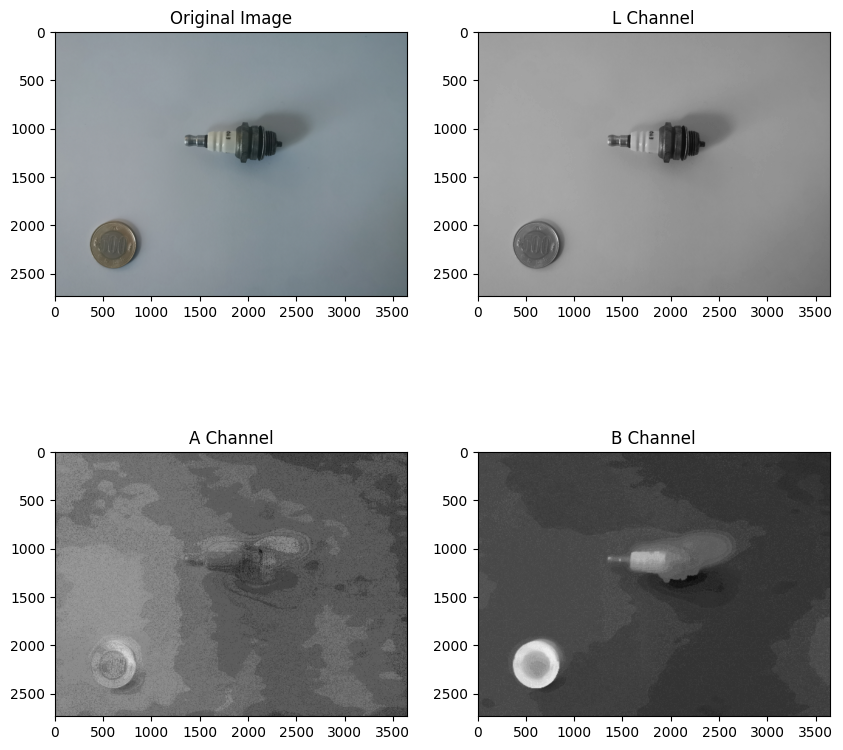

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_lab_channels(img):
    # Charger l'image
    
    # Convertir l'image en espace de couleur LAB
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # Séparer les canaux LAB
    l_channel, a_channel, b_channel = cv2.split(lab_img)
    
    # Afficher les canaux
    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convertir BGR en RGB pour affichage correct
    
    plt.subplot(2, 2, 2)
    plt.title('L Channel')
    plt.imshow(l_channel, cmap='gray')
    
    plt.subplot(2, 2, 3)
    plt.title('A Channel')
    plt.imshow(a_channel, cmap='gray')
    
    plt.subplot(2, 2, 4)
    plt.title('B Channel')
    plt.imshow(b_channel, cmap='gray')
    
    plt.show()

image = cv2.imread('../DataBase/image14.jpg')
show_lab_channels(image)